In [285]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import glob 
import os
import optuna

# Sckit-Learn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV

# Classifier Models
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import cv
import gc
from sklearn.model_selection import KFold, GroupKFold

# Metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, log_loss

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [286]:
df_spectrogram = pd.read_csv('./New_all_Spectrogram_df.csv')
df_train = pd.read_csv('./Cleaned_Train.csv')
DBSCAN_df = pd.read_csv('./DBSCAN_all_Spectrogram_df.csv')

# df_train.head()
DBSCAN_df.head()

,spec_id,PCA_mean,PCA_std,PCA_max,PCA_min,DBSCAN_Cluster
0,789577333,1.291896e-15,19.261924,240.598954,-4.704242,-1
1,1552638400,0.000000e+00,13.660815,57.496412,-16.031266,-1
2,14960202,1.114577e-15,11.647719,110.324860,-10.831656,-1
3,618728447,-2.870880e-16,12.895300,42.057751,-26.740369,-1
4,52296320,0.000000e+00,12.058408,95.127388,-11.011810,-1


In [287]:
df_spectrogram.head()

,spec_id,PCA_mean,PCA_std,PCA_max,PCA_min,DBSCAN_Cluster
0,789577333,1.291896e-15,19.261924,240.598954,-4.704242,-1
1,1552638400,0.000000e+00,13.660815,57.496412,-16.031266,-1
2,14960202,5.572884e-16,11.647719,110.324860,-10.831656,-1
3,618728447,0.000000e+00,12.895300,42.057751,-26.740369,-1
4,52296320,0.000000e+00,12.058408,95.127388,-11.011810,-1


In [288]:
df_spectrogram = pd.read_csv('./All_Spectrogram_df.csv')
df_train = pd.read_csv('./Cleaned_Train.csv')
DBSCAN_df = pd.read_csv('./DBSCAN_all_Spectrogram_df.csv')

df_spectrogram.head()

,spec_id,Delta_mean,Delta_std,Delta_max,Delta_min,Theta_mean,Theta_std,Theta_max,Theta_min,Alpha_mean,...,Alpha_max,Alpha_min,Beta_mean,Beta_std,Beta_max,Beta_min,Gamma_mean,Gamma_std,Gamma_max,Gamma_min
0,789577333,-0.084822,5.423150,18.199330,-13.821374,-0.003952,5.746205,23.635178,-19.328606,0.012400,...,20.316888,-21.583509,-0.031316,11.087311,82.140423,-85.545198,0.009573,8.853334,68.455779,-60.802076
1,1552638400,1.229371,7.990273,15.151297,-15.308333,-0.121370,4.752720,12.796805,-13.534956,0.053858,...,8.339128,-8.147426,-0.008322,5.166826,17.001601,-19.983837,0.006472,2.391511,9.647242,-11.055717
2,14960202,-0.094342,5.023570,14.538416,-15.997628,-0.006453,3.348026,13.126677,-13.095612,0.002106,...,13.660389,-14.417615,-0.001205,4.936423,34.169014,-28.813385,-0.000437,3.537729,20.433267,-21.004481
3,618728447,-0.201644,9.499750,33.493660,-17.531851,-0.000698,2.265310,8.155790,-7.083481,-0.003954,...,6.207452,-5.562863,-0.003710,3.744100,13.502028,-14.571846,-0.007452,2.573001,8.054287,-8.380472
4,52296320,1.115932,8.098242,20.153109,-15.305898,-0.128642,3.371384,10.398427,-7.921776,0.030056,...,4.838609,-5.128099,0.015284,3.247534,19.405804,-19.950676,0.007421,2.937682,17.203086,-18.702084


In [289]:
df_spectrogram = pd.read_csv('./All_Spectrogram_df.csv')
df_train = pd.read_csv('./Cleaned_Train.csv')
DBSCAN_df = pd.read_csv('./DBSCAN_all_Spectrogram_df.csv')
EEG_df = pd.read_csv('./ALL_EEG_DF.csv')
EEG_df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

# Merge the dataframes on the 'spec_id' column
data = pd.merge(df_spectrogram, df_train, on='spec_id')
data = pd.merge(data, DBSCAN_df, on = 'spec_id')
data = pd.merge(data, EEG_df, on = 'eeg_id')
# data.drop(columns = ['Unnamed: 0_x'], axis = 1, inplace = True)

# Assuming 'df' is your pandas DataFrame and you want to rename 'old_column_name' to 'new_column_name'
data.rename(columns={'spec_id': 'spectrogram_id'}, inplace=True)


In [290]:
data.head()

,spectrogram_id,Delta_mean,Delta_std,Delta_max,Delta_min,Theta_mean,Theta_std,Theta_max,Theta_min,Alpha_mean,...,target,PCA_mean,PCA_std,PCA_max,PCA_min,DBSCAN_Cluster,eeg_mean,eeg_std_dev,eeg_skewness,eeg_kurtosis
0,789577333,-0.084822,5.423150,18.199330,-13.821374,-0.003952,5.746205,23.635178,-19.328606,0.012400,...,Other,1.291896e-15,19.261924,240.598954,-4.704242,-1,-9.247751e-09,3.277673,0.266662,2.634665
1,1552638400,1.229371,7.990273,15.151297,-15.308333,-0.121370,4.752720,12.796805,-13.534956,0.053858,...,LPD,0.000000e+00,13.660815,57.496412,-16.031266,-1,-2.080744e-08,3.418201,-0.095620,0.707421
2,14960202,-0.094342,5.023570,14.538416,-15.997628,-0.006453,3.348026,13.126677,-13.095612,0.002106,...,Other,1.114577e-15,11.647719,110.324860,-10.831656,-1,6.598395e-08,2.695353,-0.128804,0.071505
3,14960202,-0.094342,5.023570,14.538416,-15.997628,-0.006453,3.348026,13.126677,-13.095612,0.002106,...,Other,0.000000e+00,11.647719,110.324860,-10.831656,-1,6.598395e-08,2.695353,-0.128804,0.071505
4,14960202,-0.094342,5.023570,14.538416,-15.997628,-0.006453,3.348026,13.126677,-13.095612,0.002106,...,Other,5.572884e-16,11.647719,110.324860,-10.831656,-1,6.598395e-08,2.695353,-0.128804,0.071505


In [291]:
data.columns

Index(['spectrogram_id', 'Delta_mean', 'Delta_std', 'Delta_max', 'Delta_min',
       'Theta_mean', 'Theta_std', 'Theta_max', 'Theta_min', 'Alpha_mean',
       'Alpha_std', 'Alpha_max', 'Alpha_min', 'Beta_mean', 'Beta_std',
       'Beta_max', 'Beta_min', 'Gamma_mean', 'Gamma_std', 'Gamma_max',
       'Gamma_min', 'eeg_id', 'min', 'max', 'patient_id', 'seizure_vote',
       'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote',
       'target', 'PCA_mean', 'PCA_std', 'PCA_max', 'PCA_min', 'DBSCAN_Cluster',
       'eeg_mean', 'eeg_std_dev', 'eeg_skewness', 'eeg_kurtosis'],
      dtype='object')

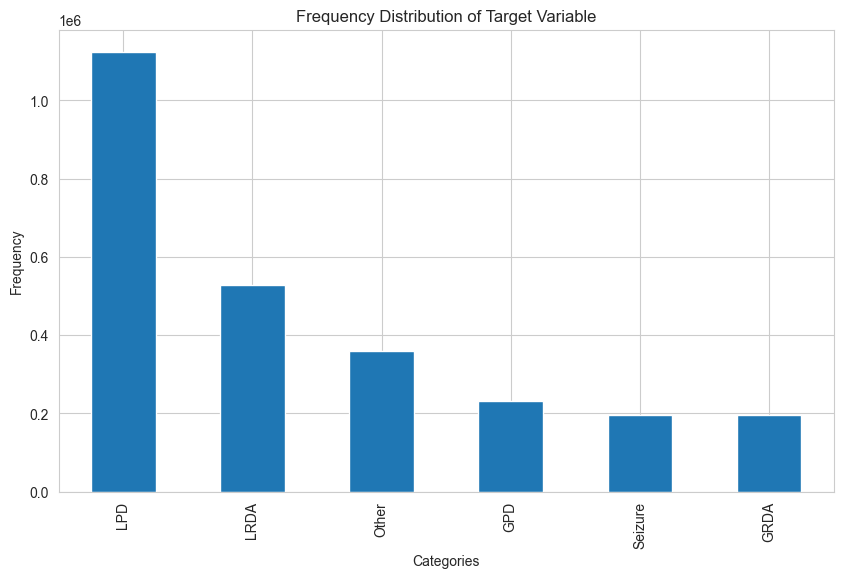

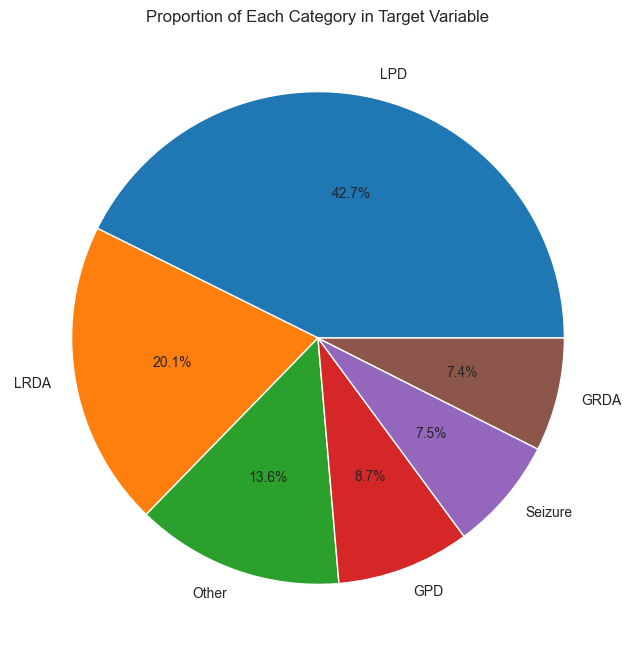

In [292]:
# Plotting the Bar Chart
plt.figure(figsize=(10, 6))
data['target'].value_counts().plot(kind='bar')
plt.title('Frequency Distribution of Target Variable')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

# Plotting the Pie Chart
plt.figure(figsize=(8, 8))
data['target'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Each Category in Target Variable')
plt.ylabel('')
plt.show()


In [293]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Assuming your target column is named 'target_column'
data['target_column_encoded'] = label_encoder.fit_transform(data['target'])
data.drop(columns = ['min', 'max', 'eeg_id', 'min', 'max', 'patient_id', 'seizure_vote',
    'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote',
    'target'], axis = 1, inplace = True)

In [294]:
data.fillna(data.mean(), inplace=True)

In [295]:
# data.to_csv('Spec_Train.csv', index = False)

In [296]:
data = pd.read_csv('./Spec_Train.csv')
data.head()

,spectrogram_id,Delta_mean,Delta_std,Delta_max,Delta_min,Theta_mean,Theta_std,Theta_max,Theta_min,Alpha_mean,...,PCA_mean,PCA_std,PCA_max,PCA_min,DBSCAN_Cluster,eeg_mean,eeg_std_dev,eeg_skewness,eeg_kurtosis,target_column_encoded
0,789577333,-0.084822,5.423150,18.199330,-13.821374,-0.003952,5.746205,23.635178,-19.328606,0.012400,...,1.291896e-15,19.261924,240.598954,-4.704242,-1,-9.247751e-09,3.277673,0.266662,2.634665,4
1,1552638400,1.229371,7.990273,15.151297,-15.308333,-0.121370,4.752720,12.796805,-13.534956,0.053858,...,0.000000e+00,13.660815,57.496412,-16.031266,-1,-2.080744e-08,3.418201,-0.095620,0.707421,2
2,14960202,-0.094342,5.023570,14.538416,-15.997628,-0.006453,3.348026,13.126677,-13.095612,0.002106,...,1.114577e-15,11.647719,110.324860,-10.831656,-1,6.598395e-08,2.695353,-0.128804,0.071505,4
3,14960202,-0.094342,5.023570,14.538416,-15.997628,-0.006453,3.348026,13.126677,-13.095612,0.002106,...,0.000000e+00,11.647719,110.324860,-10.831656,-1,6.598395e-08,2.695353,-0.128804,0.071505,4
4,14960202,-0.094342,5.023570,14.538416,-15.997628,-0.006453,3.348026,13.126677,-13.095612,0.002106,...,5.572884e-16,11.647719,110.324860,-10.831656,-1,6.598395e-08,2.695353,-0.128804,0.071505,4


In [297]:
columns_1 = ['eeg_kurtosis', 'eeg_std_dev', 'eeg_skewness', 'eeg_mean', 'Delta_mean', 'target_column_encoded']
columns_2 = ['Beta_std', 'Delta_std', 'Delta_min', 'DBSCAN_Cluster', 'Gamma_std', 'target_column_encoded']
columns_3 = ['Beta_std', 'Delta_std', 'Delta_min', 'eeg_kurtosis', 'Gamma_std', 'target_column_encoded', 'DBSCAN_Cluster']

In [298]:
data = data[columns_3]

In [299]:
data.shape

(2636545, 7)

## Feature Vector and Target Variable

In [300]:
X = data.drop(columns = ['target_column_encoded'], axis = 1)
y = data['target_column_encoded']

In [301]:
X.head()

,Beta_std,Delta_std,Delta_min,eeg_kurtosis,Gamma_std,DBSCAN_Cluster
0,11.087311,5.423150,-13.821374,2.634665,8.853334,-1
1,5.166826,7.990273,-15.308333,0.707421,2.391511,-1
2,4.936423,5.023570,-15.997628,0.071505,3.537729,-1
3,4.936423,5.023570,-15.997628,0.071505,3.537729,-1
4,4.936423,5.023570,-15.997628,0.071505,3.537729,-1


In [302]:
y.head()

0    4
1    2
2    4
3    4
4    4
Name: target_column_encoded, dtype: int64

In [303]:
y.unique()

array([4, 2, 0, 5, 1, 3])

Converting the dataset into an optimized data structure called `Dmatrix` that XGBOOST supports and gives it acclaaimed performance and efficiency gains.

In [304]:
# Define data_dmatrix
data_dmatrix = xgb.DMatrix(data = X, label = y)

### Split data into separate training and test set 

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Bagging and Boosting

In [306]:
# Implementing a Bagging model using Decision Tree as the base estimator
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_predictions = bagging_model.predict(X_test)

# Implementing a Boosting model using AdaBoost
boosting_model = AdaBoostClassifier(n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_predictions = boosting_model.predict(X_test)

# Evaluating the models
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
boosting_accuracy = accuracy_score(y_test, boosting_predictions)

bagging_accuracy, boosting_accuracy


(0.9977672814439089, 0.6048252512124446)

### Train the XGBoost Classifier

In [307]:
# declare parameters
params = {
    'objective': 'multi:softprob',  # or 'multi:softmax'
    'num_class': 6,
    'max_depth': 4,
    'alpha': 10,
    'learning_rate': 1.0,
    'n_estimators': 100
}      
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=6, ...)

In [308]:
FEATURES = data.columns
FEATURES

Index(['Beta_std', 'Delta_std', 'Delta_min', 'eeg_kurtosis', 'Gamma_std',
       'target_column_encoded', 'DBSCAN_Cluster'],
      dtype='object')

In [309]:
# def objective(trial):
#     TARS = {'Seizure':0, 'LPD':1, 'GPD':2, 'LRDA':3, 'GRDA':4, 'Other':5}
#     # Suggest hyperparameters
#     param = {
#         'verbosity': 0,
#         'objective': 'multi:softprob',
#         'num_class': len(TARS),
#         'tree_method': 'hist',  # Use 'gpu_hist' for GPU
#         'lambda': trial.suggest_loguniform('lambda', 1e-4, 10.0),
#         'alpha': trial.suggest_loguniform('alpha', 1e-4, 10.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         'max_depth': trial.suggest_int('max_depth', 3, 9),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 300)
#     }

#     # Create and train XGBoost model
#     model = xgb.XGBClassifier(**param)
#     model.fit(X_train, y_train)

#     # Make predictions and evaluate the model
#     preds = model.predict(X_test)
#     accuracy = accuracy_score(y_test, preds)

#     return accuracy

# # Create a study object and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=10)  # Adjust the number of trials

# print('Number of finished trials:', len(study.trials))
# print('Best trial:', study.best_trial.params)

In [310]:
Best_Params = {'objective': 'multi:softprob', 
    'num_class': 6,
    'lambda': 0.2298978839228972, 
    'alpha': 0.00046095109628993276, 
    'colsample_bytree': 0.9761072796646244, 
    'subsample': 0.8411932252549665, 
    'learning_rate': 0.07498125880776464, 
    'n_estimators': 762, 
    'max_depth': 8, 
    'min_child_weight': 137}

In [311]:
xgb_clf = XGBClassifier(**Best_Params)

# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=0.00046095109628993276, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9761072796646244, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.2298978839228972,
              learning_rate=0.07498125880776464, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=137, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=762, n_jobs=None, ...)

In [312]:
y_pred = xgb_clf.predict(X_test)

In [313]:
# Assuming xgb_clf is your trained XGBoost model
predictions = xgb_clf.predict_proba(X_test)

# Convert predictions to DataFrame
df_predictions = pd.DataFrame(predictions, columns=['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote'])

# Display the DataFrame
df_predictions.head()


,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1.239799e-05,0.000003,0.003415,0.000006,0.004967,0.991596
1,2.782288e-06,0.000008,0.004150,0.995687,0.000091,0.000061
2,9.402218e-06,0.000007,0.006409,0.993514,0.000012,0.000048
3,9.731705e-07,0.000002,0.004098,0.995891,0.000004,0.000004
4,6.018395e-06,0.000020,0.997964,0.001907,0.000075,0.000028


In [314]:
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.9691


In [315]:
# Assuming y_test are the true labels and y_pred are the model predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
logloss = log_loss(y_test, predictions) # Note: for log loss, you need the probability predictions

# Print the metrics
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\nLog Loss: {logloss}\n")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.9691212242276513
Precision: 0.9665544901978396
Recall: 0.9556948830512785
F1 Score: 0.9609352720947525
Log Loss: 0.06933126764963195

Confusion Matrix:
[[ 67063   1374    549     16    455     91]
 [   204  57855    184     28    593     87]
 [   220     28 333690    268   2374    872]
 [    22     25    197 157101    399    182]
 [   410    173   7048   1147  97788   1682]
 [   101     23   1906   1017   2749  53043]]


Hamming Loss is a metric for evaluating multi-class classification models, which can also be extended to multi-label classification problems. It measures the fraction of the wrong labels to the total number of labels - in other words, it's the fraction of labels that are incorrectly predicted.

Here's a more detailed breakdown:

- In a multi-class classification, the Hamming Loss is the fraction of the wrong predictions to the total number of predictions (or instances).
- In a multi-label classification, where each instance can have multiple labels, the Hamming Loss measures the fraction of the incorrect labels to the total number of labels across all instances.

Mathematically, for N samples, Hamming Loss is calculated as:

\[ \text{Hamming Loss} = \frac{1}{N} \sum_{i=1}^{N} \frac{\text{XOR}(y_i, \hat{y}_i)}{L} \]

Where:
- \( N \) is the number of samples.
- \( y_i \) is the true label vector for the \( i^{th} \) sample.
- \( \hat{y}_i \) is the predicted label vector for the \( i^{th} \) sample.
- \( L \) is the number of labels.
- XOR is the exclusive OR operation applied between the true and predicted label vectors, counting the number of label mismatches.

A Hamming Loss of 0 means a perfect classifier. As the value increases, the accuracy of the model decreases. One of the key characteristics of Hamming Loss is that it takes into account the prediction error (false positives and false negatives) and the missing error (true positives not predicted as such), which makes it particularly useful for imbalanced datasets.


The result is a value between 0 and 1, where a lower value indicates better performance.

---

In [316]:
print('XGBoost model hamming score: {0:0.4f}'. format(hamming_loss(y_test, y_pred)))

XGBoost model hamming score: 0.0309


### 6. Feature importance with XGBoost

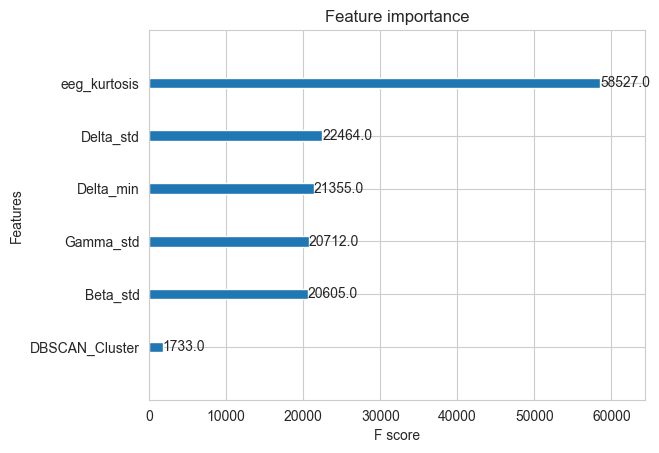

<Figure size 1600x1200 with 0 Axes>

In [317]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

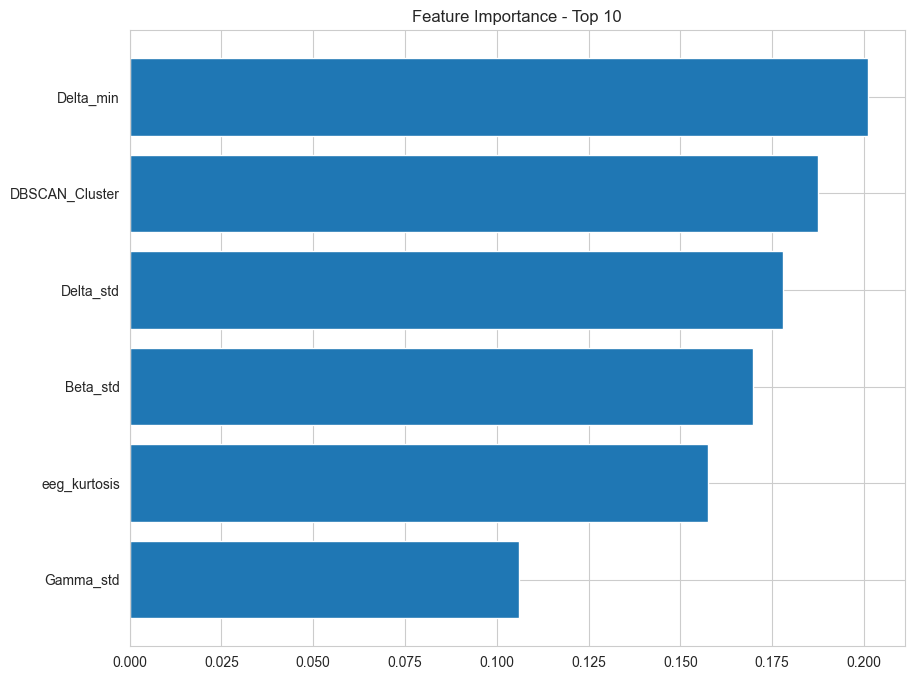

In [318]:
TOP = 10

# Assuming 'model' is your trained model
feature_importance = xgb_clf.feature_importances_

# Get the feature names from 'train'
feature_names = X_train.columns

# Sort the feature importances and get the indices of the sorted array
sorted_idx = np.argsort(feature_importance)

# Plot only the top 'TOP' features
fig = plt.figure(figsize=(10, 8))
plt.barh(np.arange(len(sorted_idx))[-TOP:], feature_importance[sorted_idx][-TOP:], align='center')
plt.yticks(np.arange(len(sorted_idx))[-TOP:], feature_names[sorted_idx][-TOP:])
plt.title(f'Feature Importance - Top {TOP}')
plt.show()

In [319]:
xgb_clf.save_model('xgb_model_5.json')

# ... later or in a different environment ...

# Create an XGBClassifier instance
xgb_clf_loaded = xgb.XGBClassifier(**Best_Params)

# Load the model from the file
xgb_clf_loaded.load_model('./xgb_model_5.json')

# Now xgb_clf_loaded can be used to make predictions
